In [30]:
# Import semua library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
# Membuat dataframe untuk jumlah umkm
umkm_df = pd.read_csv('data-umkm-provinsi-kaltim-tahun-2016-2020.csv')
umkm_df.rename(columns={
    'UMKM': 'tahun'
}, inplace=True)
umkm_df.head(5)

,tahun,jumlah_mikro,jumlah_kecil,jumlah_menengah,total_umkm,penyerapan_tenaga_kerja
0,2016,270469,181840,788,453097,1064107
1,2017,270469,181840,788,453097,1064107
2,2018,170569,133497,10179,314245,1080072
3,2019,297207,9440,696,307343,1080181
4,2020,271101,8110,510,279721,106121


In [36]:
# Membuat DataFrame yang berisi tingkat pertumbuhan ekonomi (YoY), ipm, dan inflasi (YoY)
pertumbuhan_ekonomi = {
    'pertumbuhan_ekonomi' : [-0.30, 1.61, 5.14, 2.67, -2.83],
    'ipm' : [74.59, 75.12, 75.83, 76.61, 76.24],
    'inflasi' : [3.39, 3.15, 3.24, 1.66, 0.78]
}
pertumbuhan_ekonomi_df = pd.DataFrame(pertumbuhan_ekonomi)
pertumbuhan_ekonomi_df.head()

,pertumbuhan_ekonomi,ipm,inflasi
0,-0.30,74.59,3.39
1,1.61,75.12,3.15
2,5.14,75.83,3.24
3,2.67,76.61,1.66
4,-2.83,76.24,0.78


In [39]:
# Menyatukan semua dataframe
df = pd.concat([umkm_df, pertumbuhan_ekonomi_df], axis=1)
df.drop(['jumlah_mikro', 'jumlah_kecil', 'jumlah_menengah'], axis=1, inplace=True)
df.head()

,tahun,total_umkm,penyerapan_tenaga_kerja,pertumbuhan_ekonomi,ipm,inflasi
0,2016,453097,1064107,-0.30,74.59,3.39
1,2017,453097,1064107,1.61,75.12,3.15
2,2018,314245,1080072,5.14,75.83,3.24
3,2019,307343,1080181,2.67,76.61,1.66
4,2020,279721,106121,-2.83,76.24,0.78


In [40]:
# Melihat nilai korelasi antar variabel
df.corr()

,tahun,total_umkm,penyerapan_tenaga_kerja,pertumbuhan_ekonomi,ipm,inflasi
tahun,1.000000,-0.920390,-0.695241,-0.209868,0.921379,-0.912227
total_umkm,-0.920390,1.000000,0.524647,-0.035364,-0.914440,0.742479
penyerapan_tenaga_kerja,-0.695241,0.524647,1.000000,0.768161,-0.366716,0.793098
pertumbuhan_ekonomi,-0.209868,-0.035364,0.768161,1.000000,0.111750,0.539259
ipm,0.921379,-0.914440,-0.366716,0.111750,1.000000,-0.776168
inflasi,-0.912227,0.742479,0.793098,0.539259,-0.776168,1.000000


In [68]:
# Melihat parameter statistik
df.describe()

,tahun,total_umkm,penyerapan_tenaga_kerja,pertumbuhan_ekonomi,ipm,inflasi
count,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000
mean,2018.000000,361500.600000,8.789176e+05,1.258000,75.678000,2.444000
std,1.581139,84607.684833,4.320807e+05,3.013581,0.821991,1.163026
min,2016.000000,279721.000000,1.061210e+05,-2.830000,74.590000,0.780000
25%,2017.000000,307343.000000,1.064107e+06,-0.300000,75.120000,1.660000
50%,2018.000000,314245.000000,1.064107e+06,1.610000,75.830000,3.150000
75%,2019.000000,453097.000000,1.080072e+06,2.670000,76.240000,3.240000
max,2020.000000,453097.000000,1.080181e+06,5.140000,76.610000,3.390000


In [91]:
# Memisahkan independent variable (X) dan dependent variable (y)
X = df[['total_umkm', 'penyerapan_tenaga_kerja', 'inflasi', 'ipm']]
y = df['pertumbuhan_ekonomi']

In [92]:
# Membuat model
model = LinearRegression()

In [93]:
# Memasukkan data (label & atribut) ke model
model.fit(X, y)

LinearRegression()

In [94]:
# mengambil nilai b, w1, w2, w3, dan w4
bias = model.intercept_
weights = model.coef_

In [95]:
# Menulis formmula regresi linear dari data di atas
form = f'y = {bias:.3f} + ({weights[0]:.2e})X1 + ({weights[1]:.2e})X2 + ({weights[2]:.3f})X3 + ({weights[3]:.3f})X4'

In [96]:
print(form)

y = -429.956 + (5.61e-06)X1 + (-4.77e-07)X2 + (4.273)X3 + (5.539)X4


In [97]:
# y -> pertumbuhan ekonomi
# X1 -> total umkm
# X2 -> penyerapan tenaga kerja
# X3 -> inflasi
# X4 -> Indeks Pembangunan Manusia

# Visualisasi Data

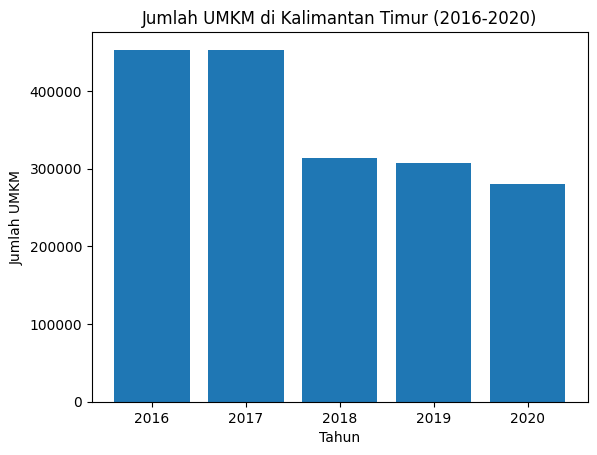

In [84]:
# Visualisasi data jumlah UMKM dari tahun ke tahun
plt.bar(df['tahun'], df['total_umkm'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah UMKM')
plt.title('Jumlah UMKM di Kalimantan Timur (2016-2020)')
plt.show()

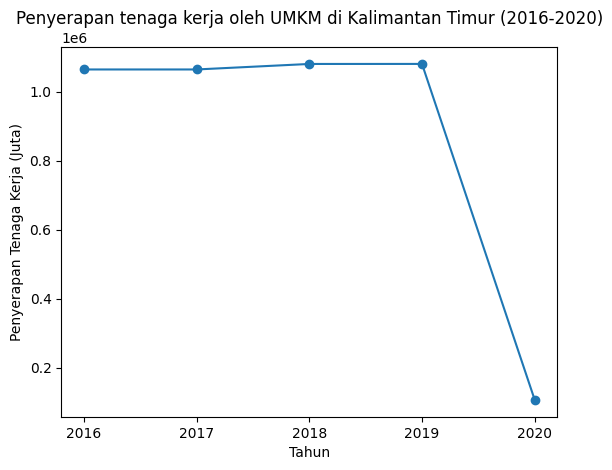

In [99]:
# Visualisasi data penyerapan tenaga kerja
plt.plot(df['tahun'], df['penyerapan_tenaga_kerja'], marker='o')
plt.xticks([int(tahun) for tahun in df['tahun']])
plt.xlabel('Tahun')
plt.ylabel('Penyerapan Tenaga Kerja (Juta)')
plt.title('Penyerapan tenaga kerja oleh UMKM di Kalimantan Timur (2016-2020)')
plt.show()

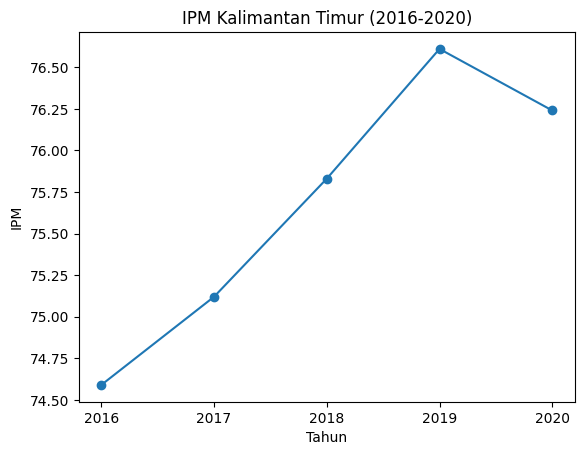

In [98]:
# Visualisasi data IPM
plt.plot(df['tahun'], df['ipm'], marker='o')
plt.xticks([int(tahun) for tahun in df['tahun']])
plt.xlabel('Tahun')
plt.ylabel('IPM')
plt.title('IPM Kalimantan Timur (2016-2020)')
plt.show()

# KESIMPULAN

Kesimpulan yang dapat diambil adalah :
- Sebagian besar UMKM adalah skala menengah
- Total UMKM per tahunnya semakin berkurang
- Pertumbuhan ekonomi (YoY) dan inflasi memiliki korelasi positif yang lumayan kuat (Nilai korelasi = 0.53)
- Terdapat penurunan yang tajam dari penyerapan tenaga kerja pada 2019-2020
- Penyerapan tenaga kerja oleh UMKM memiliki korelasi positif yang cukup kuat dengan pertumbuhan ekonomi (Nilai Korelasi = 0.768)
- Pada formula regresi linear yang diperoleh, diperoleh yang paling berdampak ke pertumbuhan ekonomi adalah Indeks Pembangunan Manusia (Setiap 1 poin meningkat pada IPM, Ekonomi Kalimantan Timur meningkat sebesar 5.538 poin)